#Exploratory Data Analysis

##Import Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive')

# Loadiing  the imputed data done by Opaline/Aarushi
df = pd.read_csv('/content/drive/My Drive/data_imputated_raw.csv')

# Small verification
print(f"Missing values: {df.isnull().sum().sum()}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Missing values: 0


## Target Distribution Visual

/tmp/ipython-input-2187563731.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='viridis')


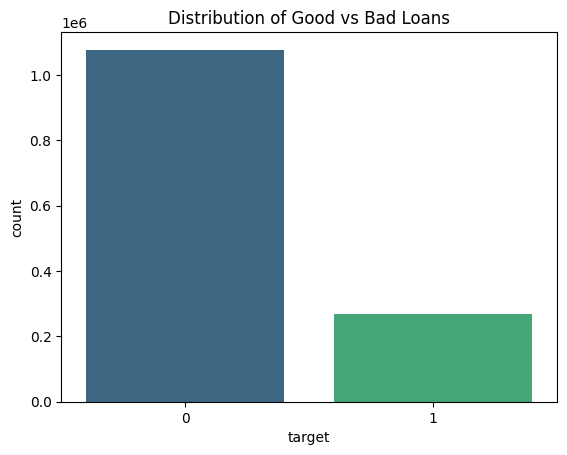

In [2]:
sns.countplot(x='target', data=df, palette='viridis')
plt.title('Distribution of Good vs Bad Loans')
plt.show()

## Feature Mapping

In [3]:
print(df.columns)

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       ...
       'emp_length_was_missing', 'tot_coll_amt_was_missing',
       'total_rev_hi_lim_was_missing', 'mo_sin_old_rev_tl_op_is_missing',
       'tot_cur_bal_is_missing', 'bc_util_is_missing',
       'avg_cur_bal_is_missing', 'bc_open_to_buy_is_missing', 'is_thin_file',
       'has_modern_metrics'],
      dtype='object', length=117)


## Initial Data Statistics

Laying out the overall statistical description of the dataset produced after cleaning, performing feature engineering and imputation.


In [4]:
print("First 5 rows of the DataFrame:")
print(df.head())

print("\nConcise summary of the DataFrame (df.info()):")
df.info()

print("\nDescriptive statistics for numerical columns (df.describe()):")
print(df.describe())

First 5 rows of the DataFrame:
   loan_amnt        term  int_rate  installment grade sub_grade emp_length  \
0     3600.0   36 months     13.99       123.03     C        C4  10+ years   
1    24700.0   36 months     11.99       820.28     C        C1  10+ years   
2    20000.0   60 months     10.78       432.66     B        B4  10+ years   
3    10400.0   60 months     22.45       289.91     F        F1    3 years   
4    11950.0   36 months     13.44       405.18     C        C3    4 years   

  home_ownership  annual_inc verification_status  ... emp_length_was_missing  \
0       MORTGAGE     55000.0        Not Verified  ...                      0   
1       MORTGAGE     65000.0        Not Verified  ...                      0   
2       MORTGAGE     63000.0        Not Verified  ...                      0   
3       MORTGAGE    104433.0     Source Verified  ...                      0   
4           RENT     34000.0     Source Verified  ...                      0   

  tot_coll_amt_was_

## Histogram Distribution

We can see that the distributions of most features has to be normalized before training.




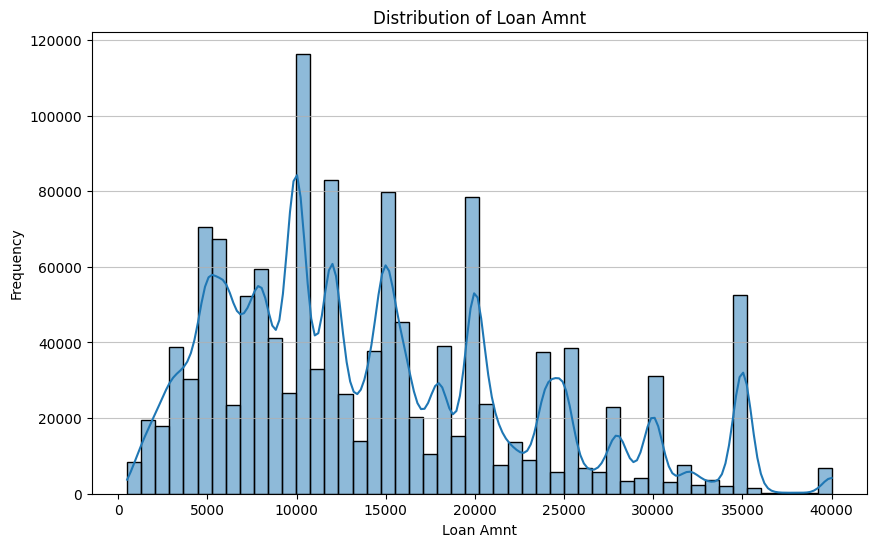

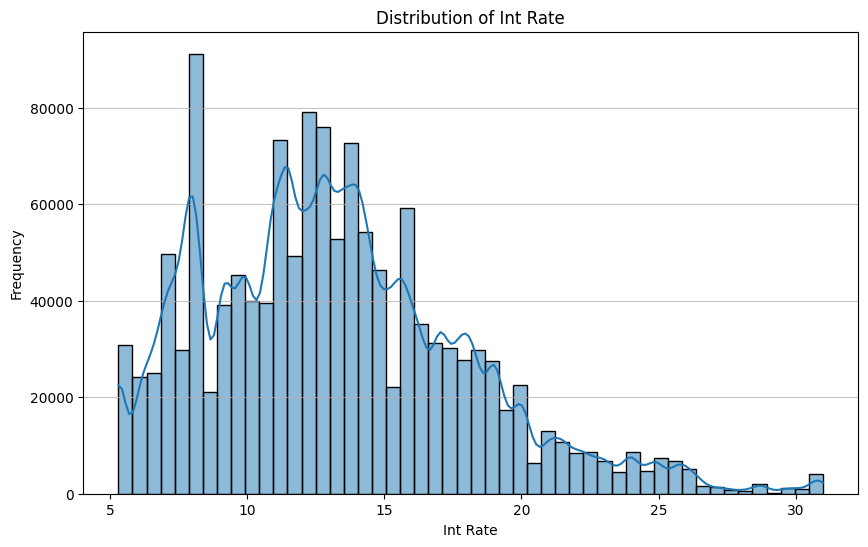

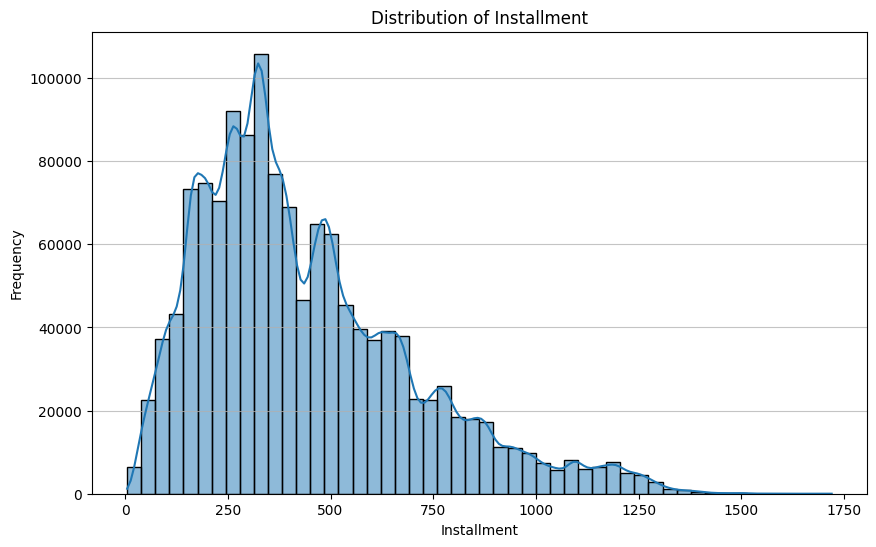

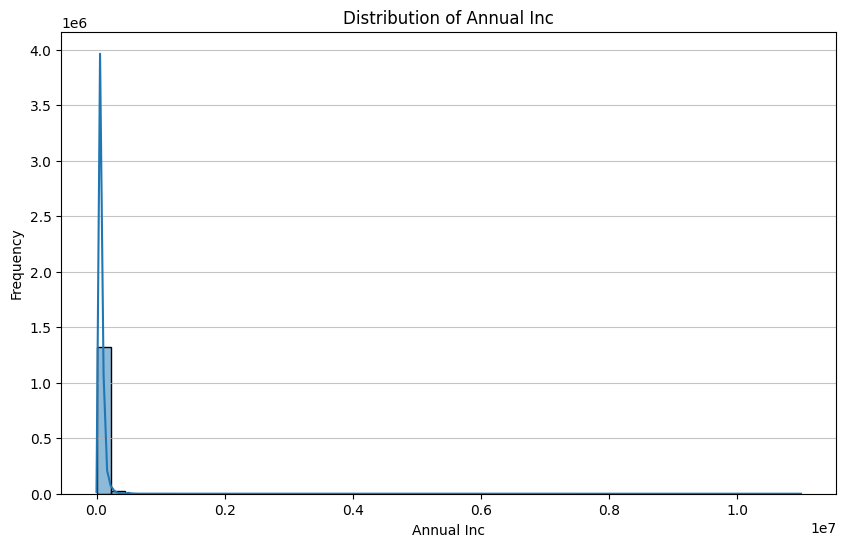

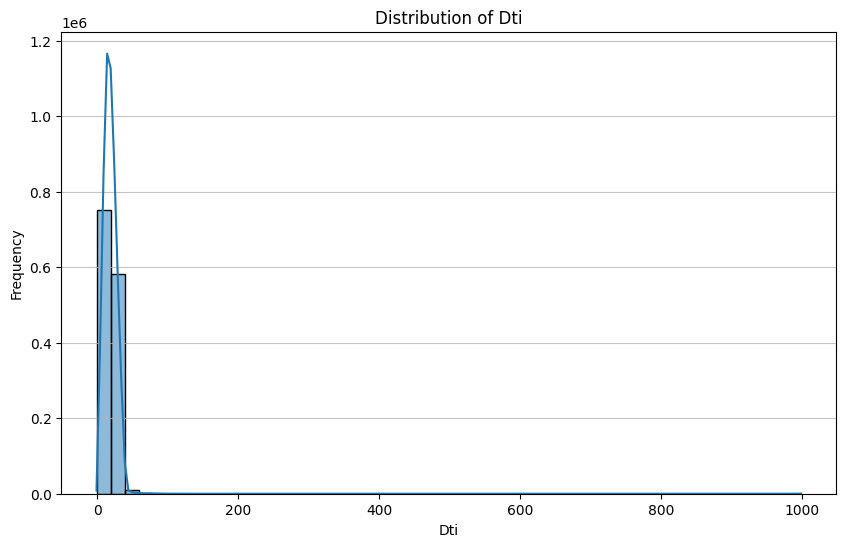

In [5]:
numerical_features = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti']

for col in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(f'Distribution of {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

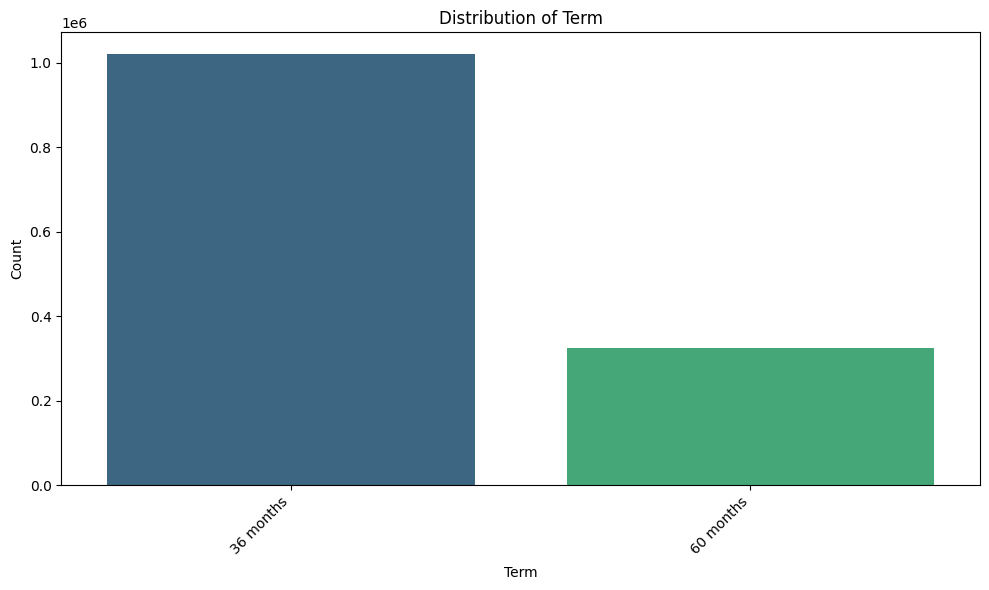

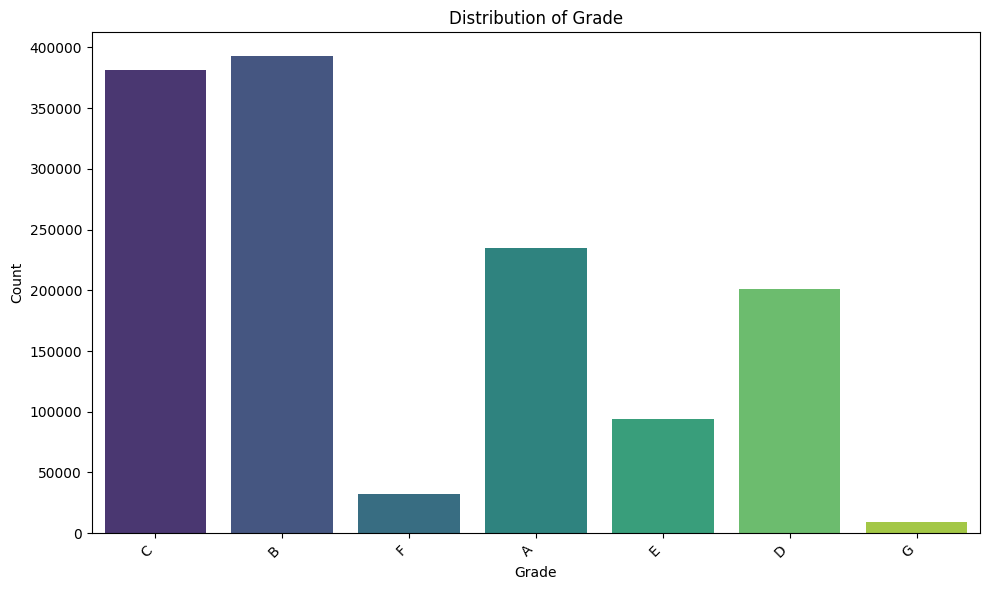

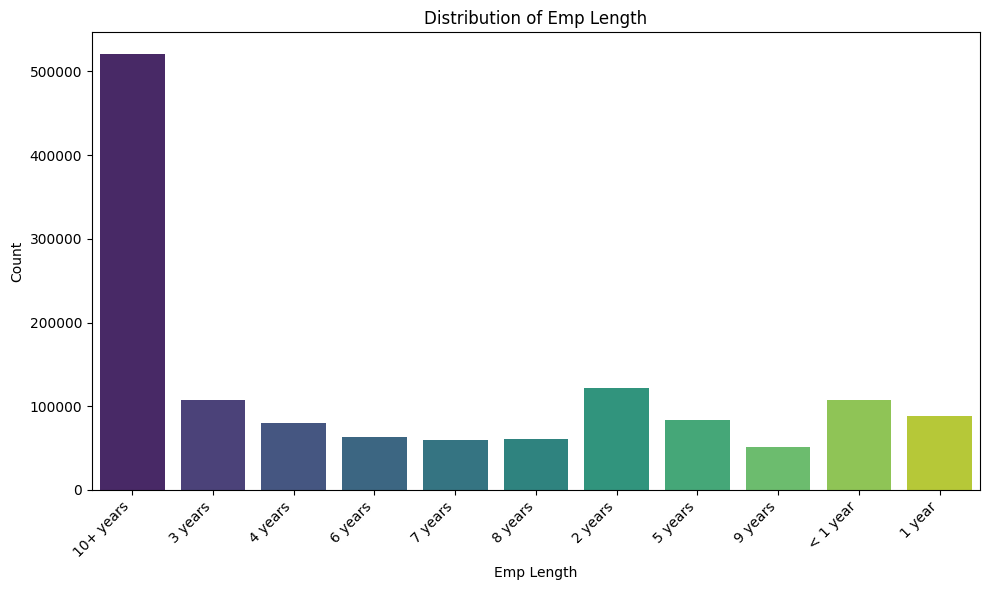

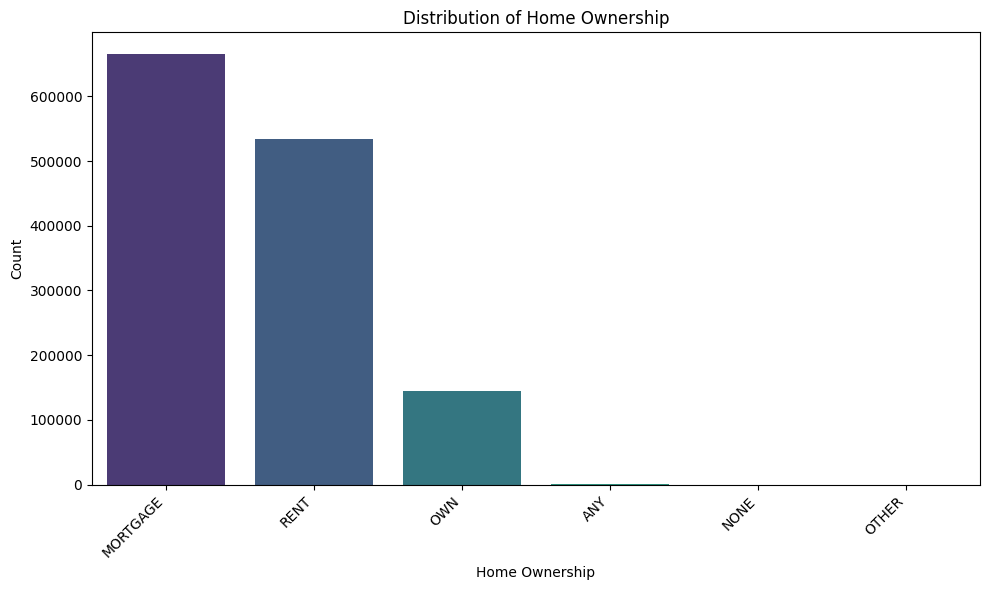

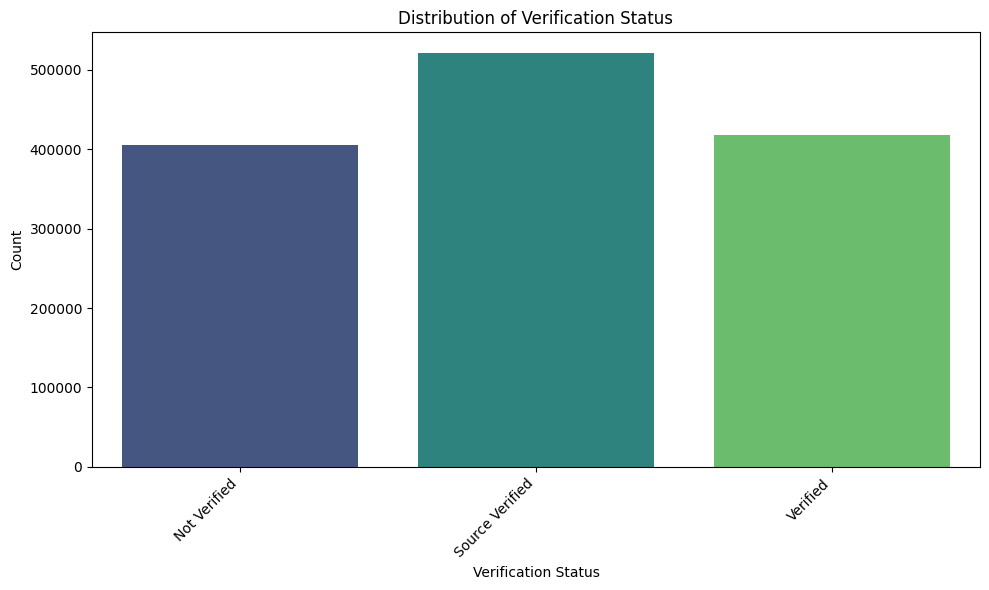

In [6]:
categorical_features = ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status']

for col in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df, palette='viridis', hue=col, legend=False)
    plt.title(f'Distribution of {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability if needed
    plt.tight_layout()
    plt.show()

## Investigate Relationship between DTI and Target

We must analyze the relationship between DTI i.e. Debt-to-Income ratio and the target variable as I believe that based on intuition from other papers that it affects loan performance.


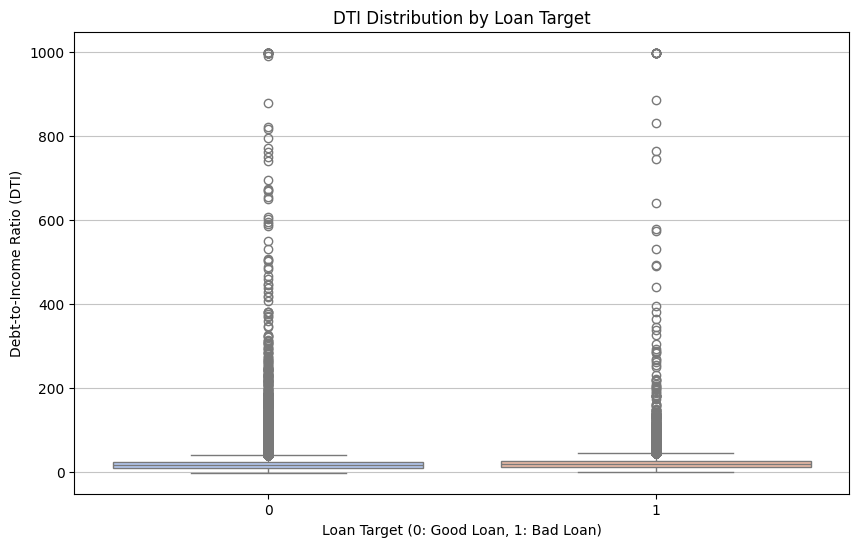

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='dti', data=df, palette='coolwarm', hue='target', legend=False)
plt.title('DTI Distribution by Loan Target')
plt.xlabel('Loan Target (0: Good Loan, 1: Bad Loan)')
plt.ylabel('Debt-to-Income Ratio (DTI)')
plt.grid(axis='y', alpha=0.75)
plt.show()

## Correlation Analysis of Numerical Features

We perform correlation analysis of the features we have in the dataframe and we visualize it with a heatmap.


In [8]:
numerical_df = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()
print("Calculated correlation matrix for numerical features.")

Calculated correlation matrix for numerical features.


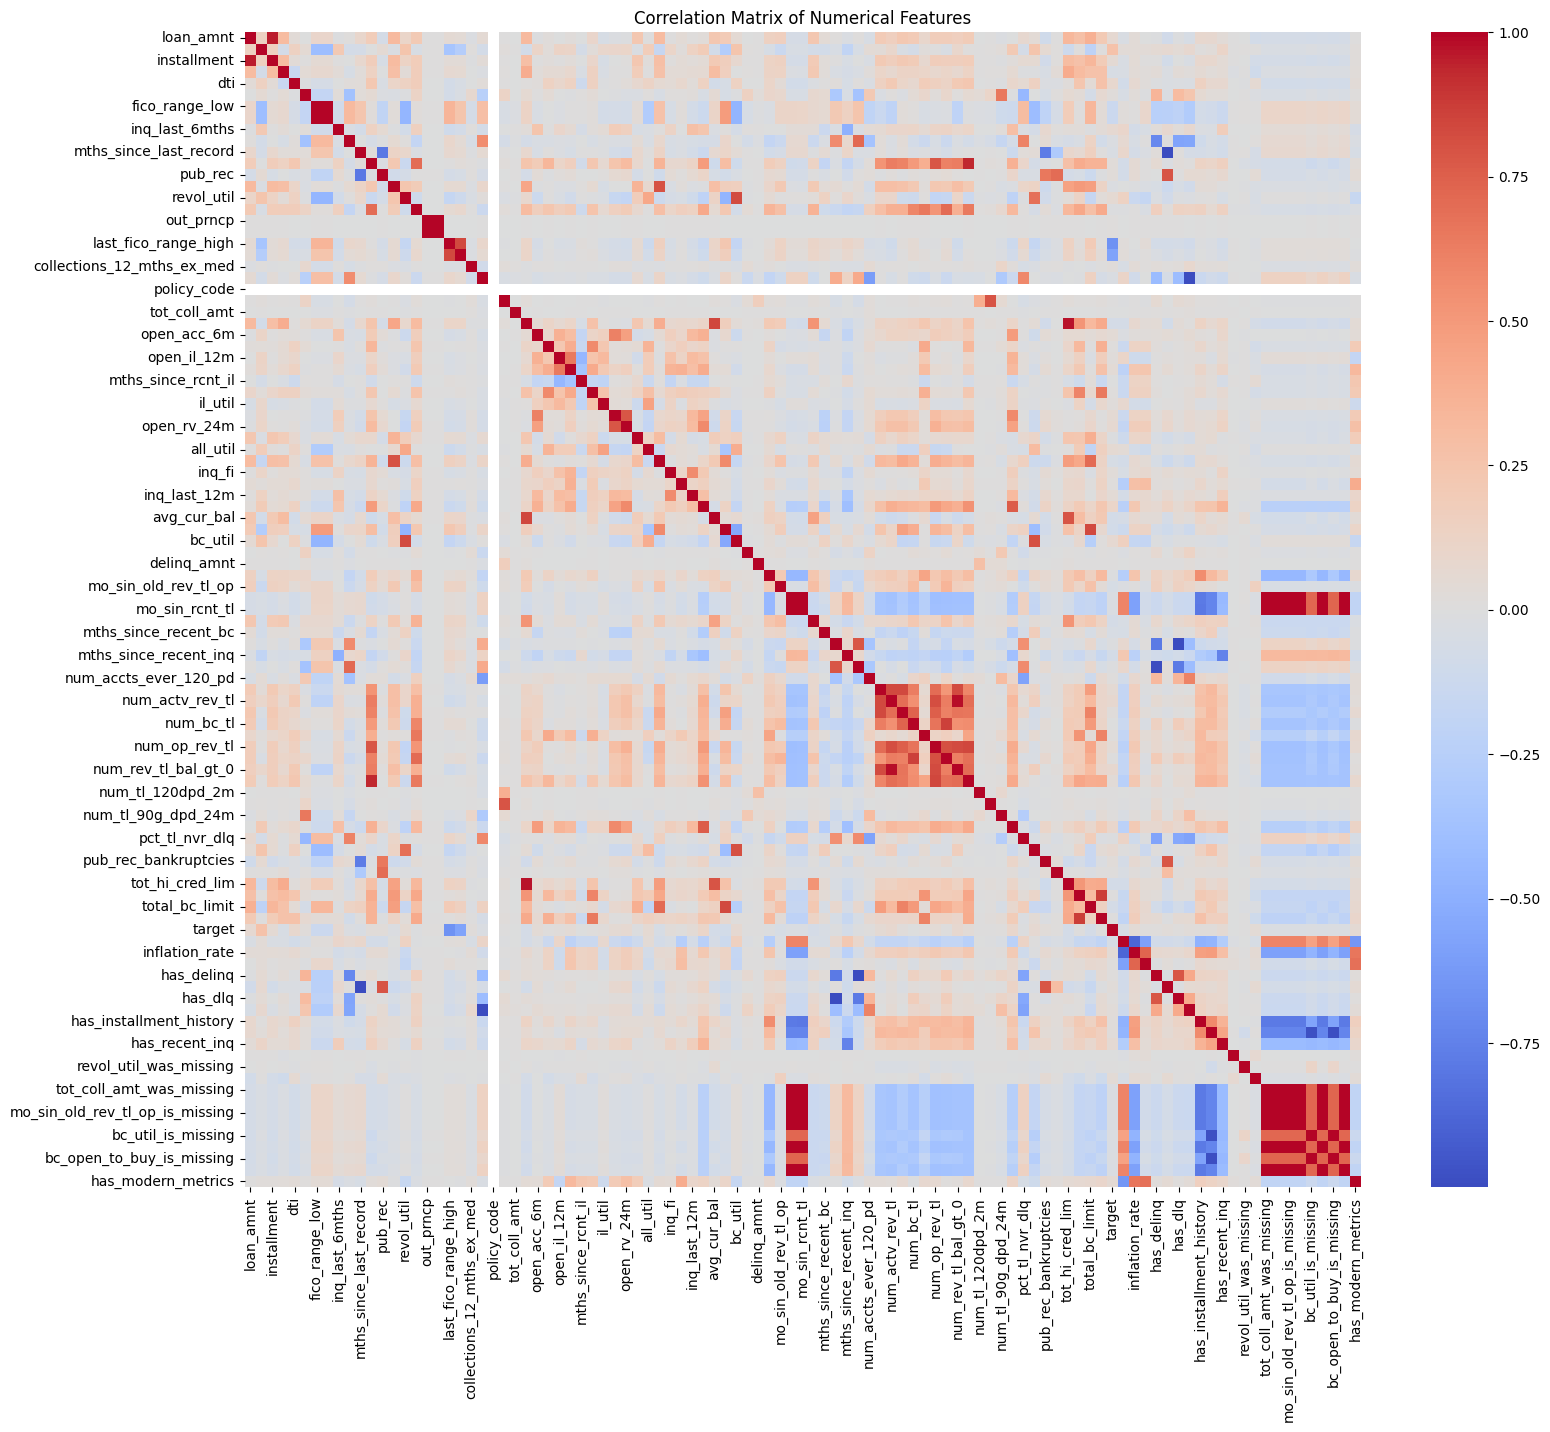

In [9]:
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Summary of Key Findings and Next Steps



Here's some findings:
1. The descriptive statistics reveals wide ranges for some numerical features like annual_inc and dti which indicates outliers or skewed distributions.
2. Imbalance in target variable distribution which needs to be addressed with oversampling method like SMOTE.
3.  **Numerical Features Distribution**:
    *   `loan_amnt`, `installment`: Showed distributions skewed towards lower values, with peaks indicating common loan amounts and installment sizes.
    *   `int_rate`: Appeared to have multiple peaks, suggesting different interest rate tiers or policies.
    *   `annual_inc`: Highly skewed to the right, with a long tail indicating a few high earners, while the majority have lower incomes. There were also zero values, which might need investigation.
    *   `dti`: Generally followed a normal-like distribution but with a long tail on the right and some extreme values, indicating potential outliers.
4.  **Categorical Features Distribution**:
    *   `term`: Dominated by '36 months' loans, with '60 months' being less frequent.
    *   `grade`, `sub_grade`: Showed a graded distribution, with 'B' and 'C' grades being most common.
    *   `emp_length`: '10+ years' was the most frequent employment length, suggesting experienced borrowers.
    *   `home_ownership`: 'MORTGAGE' and 'RENT' were the most common categories.
    *   `verification_status`: 'Not Verified' and 'Source Verified' were the most prevalent, with 'Verified' being less common.
5.  **DTI vs. Target Relationship**: The boxplot suggested that bad loans (target=1) tend to have a slightly higher median DTI and a wider spread, implying that higher DTI might be associated with a greater risk of default, though there's significant overlap.
6.  **Correlation Analysis**: The heatmap revealed several highly correlated numerical features (e.g., `loan_amnt` and `installment`), which is expected. Identifying these helps in understanding multicollinearity and potential feature selection strategies.

### Next Steps:

1.  **Address Target Imbalance**: Given the imbalance in the 'target' variable, techniques such as oversampling (SMOTE), undersampling, or using appropriate evaluation metrics (e.g., precision, recall, F1-score) should be considered during model training.
2.  **Outlier Treatment**: Further investigate and handle outliers in numerical features like `annual_inc` and `dti`, as they can significantly impact model performance. This might involve capping, transforming, or removing extreme values.
3.  **Feature Engineering**: Explore creating new features from existing ones. For example, combine `grade` and `sub_grade` into a more granular feature or create ratio features.
4.  **Categorical Feature Encoding**: Convert categorical features (`term`, `grade`, `emp_length`, `home_ownership`, `verification_status`, etc.) into numerical representations using techniques like One-Hot Encoding or Label Encoding, depending on their cardinality and nature.
5.  **Dimensionality Reduction/Feature Selection**: Given the large number of features, consider techniques like PCA or feature selection methods (e.g., based on importance, VIF) to reduce dimensionality and handle highly correlated features, improving model interpretability and preventing overfitting.
6.  **Data Scaling**: Standardize or normalize numerical features to ensure that no single feature dominates the learning process, which is crucial for many machine learning algorithms.
7.  **Model Building and Evaluation**: Proceed to build predictive models using various algorithms and evaluate their performance based on chosen metrics, keeping the target imbalance in mind.

## Feature Selection - Address Multicollinearity

Investigate and remove `installment` due to high multicollinearity with `loan_amnt`.


In [1]:
import pandas as pd
import numpy as np

# Reloading the dataset into a DataFrame named df
df = pd.read_csv('/content/drive/My Drive/data_imputated_raw.csv')

# Reapplying the outlier capping to 'annual_inc' and 'dti' columns
perc1_annual_inc = df['annual_inc'].quantile(0.01)
perc99_annual_inc = df['annual_inc'].quantile(0.99)
df['annual_inc'] = np.where(df['annual_inc'] < perc1_annual_inc, perc1_annual_inc, df['annual_inc'])
df['annual_inc'] = np.where(df['annual_inc'] > perc99_annual_inc, perc99_annual_inc, df['annual_inc'])

perc1_dti = df['dti'].quantile(0.01)
perc99_dti = df['dti'].quantile(0.99)
df['dti'] = np.where(df['dti'] < perc1_dti, perc1_dti, df['dti'])
df['dti'] = np.where(df['dti'] > perc99_dti, perc99_dti, df['dti'])

print("Dataset reloaded and outliers in 'annual_inc' and 'dti' have been capped.")

Dataset reloaded and outliers in 'annual_inc' and 'dti' have been capped.


In [2]:
X = df.drop('target', axis=1)
y = df['target']

print("Features (X) and target (y) separated.")

Features (X) and target (y) separated.


We use pearson correlation coefficient to find the correlation between the two mentioned features and eliminate it due to high correlation thus making it redundant.



In [3]:
correlation = X['loan_amnt'].corr(X['installment'])
print(f"Pearson correlation coefficient between 'loan_amnt' and 'installment': {correlation:.2f}")

Pearson correlation coefficient between 'loan_amnt' and 'installment': 0.95


In [4]:
X = X.drop('installment', axis=1)

print("The 'installment' column has been removed from X.")


The 'installment' column has been removed from X.


In [5]:
print("First 5 rows of X after removing 'installment':")
print(X.head())

print("\nUpdated columns in X:")
print(X.columns)

First 5 rows of X after removing 'installment':
   loan_amnt        term  int_rate grade sub_grade emp_length home_ownership  \
0     3600.0   36 months     13.99     C        C4  10+ years       MORTGAGE   
1    24700.0   36 months     11.99     C        C1  10+ years       MORTGAGE   
2    20000.0   60 months     10.78     B        B4  10+ years       MORTGAGE   
3    10400.0   60 months     22.45     F        F1    3 years       MORTGAGE   
4    11950.0   36 months     13.44     C        C3    4 years           RENT   

   annual_inc verification_status     issue_d  ... emp_length_was_missing  \
0     55000.0        Not Verified  2015-12-01  ...                      0   
1     65000.0        Not Verified  2015-12-01  ...                      0   
2     63000.0        Not Verified  2015-12-01  ...                      0   
3    104433.0     Source Verified  2015-12-01  ...                      0   
4     34000.0     Source Verified  2015-12-01  ...                      0   

  tot_co

## Feature Engineering & Categorical Feature Consolidation

We review high-cardinality categorical features and consolidate rare categories to reduce dimensionality and manage memory.


In [6]:
categorical_cols = X.select_dtypes(include=['object']).columns

print("Unique values and their counts for each categorical column:")
for col in categorical_cols:
    print(f"\n--- Column: {col} ---")
    print(X[col].value_counts())


Unique values and their counts for each categorical column:

--- Column: term ---
term
36 months    1020768
60 months     324582
Name: count, dtype: int64

--- Column: grade ---
grade
B    392748
C    381694
A    235095
D    200966
E     93656
F     32059
G      9132
Name: count, dtype: int64

--- Column: sub_grade ---
sub_grade
C1    85496
B4    83200
B5    82541
B3    81828
C2    79215
C3    75000
C4    74422
B2    74025
B1    71154
C5    67561
A5    64005
A4    52236
D1    51323
D2    44851
A1    43679
D3    39322
A3    37997
A2    37178
D4    35568
D5    29902
E1    23749
E2    21378
E3    18387
E4    15723
E5    14419
F1     9970
F2     7198
F3     6088
F4     4859
F5     3944
G1     2997
G2     2131
G3     1614
G4     1280
G5     1110
Name: count, dtype: int64

--- Column: emp_length ---
emp_length
10+ years    520725
2 years      121751
< 1 year     108065
3 years      107602
1 year        88495
5 years       84154
4 years       80558
6 years       62735
8 years       60704
7 ye

To consolidate rare categories in 'sub_grade', I will identify categories with a frequency below 1% of the total count, group them into an 'Other' category, and then print the updated value counts to confirm the consolidation.



In [7]:
total_count_sub_grade = len(X['sub_grade'])
threshold = total_count_sub_grade * 0.01 # 1% threshold

sub_grade_counts = X['sub_grade'].value_counts()
rare_sub_grades = sub_grade_counts[sub_grade_counts < threshold].index

X['sub_grade'] = X['sub_grade'].replace(rare_sub_grades, 'Other')

print("Unique values and their counts for 'sub_grade' after consolidation:")
print(X['sub_grade'].value_counts())


Unique values and their counts for 'sub_grade' after consolidation:
sub_grade
C1       85496
B4       83200
B5       82541
B3       81828
C2       79215
C3       75000
C4       74422
B2       74025
B1       71154
C5       67561
A5       64005
A4       52236
D1       51323
D2       44851
A1       43679
Other    41191
D3       39322
A3       37997
A2       37178
D4       35568
D5       29902
E1       23749
E2       21378
E3       18387
E4       15723
E5       14419
Name: count, dtype: int64


In [8]:
total_count_home_ownership = len(X['home_ownership'])
threshold_home_ownership = total_count_home_ownership * 0.01 # 1% threshold

home_ownership_counts = X['home_ownership'].value_counts()
rare_home_ownership = home_ownership_counts[home_ownership_counts < threshold_home_ownership].index

X['home_ownership'] = X['home_ownership'].replace(rare_home_ownership, 'Other')

print("Unique values and their counts for 'home_ownership' after consolidation:")
print(X['home_ownership'].value_counts())

Unique values and their counts for 'home_ownership' after consolidation:
home_ownership
MORTGAGE    665596
RENT        534436
OWN         144840
Other          478
Name: count, dtype: int64


Following the pattern of consolidating rare categories for high-cardinality features, I will now address the 'loan_status' column. It contains a very low-frequency category ('Default') that should be grouped into 'Other' to simplify the feature and manage dimensionality, similar to 'sub_grade' and 'home_ownership'.



In [9]:
total_count_loan_status = len(X['loan_status'])
threshold_loan_status = total_count_loan_status * 0.01 # 1% threshold

loan_status_counts = X['loan_status'].value_counts()
rare_loan_status = loan_status_counts[loan_status_counts < threshold_loan_status].index

X['loan_status'] = X['loan_status'].replace(rare_loan_status, 'Other')

print("Unique values and their counts for 'loan_status' after consolidation:")
print(X['loan_status'].value_counts())

Unique values and their counts for 'loan_status' after consolidation:
loan_status
Fully Paid     1076751
Charged Off     268559
Other               40
Name: count, dtype: int64


Now that 'sub_grade', 'home_ownership', and 'loan_status' have been consolidated, I will address 'disbursement_method'and 'purpose', which also contains a low-frequency category ('DirectPay') that falls below the 1% threshold, and will group it into 'Other' to further reduce dimensionality and manage memory.



In [10]:
total_count_disbursement_method = len(X['disbursement_method'])
threshold_disbursement_method = total_count_disbursement_method * 0.01 # 1% threshold

disbursement_method_counts = X['disbursement_method'].value_counts()
rare_disbursement_method = disbursement_method_counts[disbursement_method_counts < threshold_disbursement_method].index

X['disbursement_method'] = X['disbursement_method'].replace(rare_disbursement_method, 'Other')

print("Unique values and their counts for 'disbursement_method' after consolidation:")
print(X['disbursement_method'].value_counts())

Unique values and their counts for 'disbursement_method' after consolidation:
disbursement_method
Cash     1338450
Other       6900
Name: count, dtype: int64


In [11]:
total_count_purpose = len(X['purpose'])
threshold_purpose = total_count_purpose * 0.01 # 1% threshold

purpose_counts = X['purpose'].value_counts()
rare_purpose = purpose_counts[purpose_counts < threshold_purpose].index

X['purpose'] = X['purpose'].replace(rare_purpose, 'Other')

print("Unique values and their counts for 'purpose' after consolidation:")
print(X['purpose'].value_counts())


Unique values and their counts for 'purpose' after consolidation:
purpose
debt_consolidation    780342
credit_card           295285
home_improvement       87507
other                  77877
major_purchase         29427
Other                  29352
medical                15556
small_business         15416
car                    14588
Name: count, dtype: int64


The 'pymnt_plan' column was identified as a constant feature (all 'n' values) in the earlier categorical features analysis. Such features provide no discriminative information and increase dimensionality unnecessarily. Therefore, I will remove it from the `X` DataFrame to reduce dimensionality and manage memory.



In [12]:
if 'pymnt_plan' in X.columns:
    X = X.drop('pymnt_plan', axis=1)
    print("'pymnt_plan' column removed from X.")
else:
    print("'pymnt_plan' column not found in X, skipping removal.")

'pymnt_plan' column removed from X.


Following the strategy of consolidating rare categories in high-cardinality features, I will now consolidate the 'addr_state' column. Many states have a frequency below the 1% threshold, and grouping them into an 'Other' category will help reduce dimensionality and manage memory.



In [13]:
total_count_addr_state = len(X['addr_state'])
threshold_addr_state = total_count_addr_state * 0.01 # 1% threshold

addr_state_counts = X['addr_state'].value_counts()
rare_addr_state = addr_state_counts[addr_state_counts < threshold_addr_state].index

X['addr_state'] = X['addr_state'].replace(rare_addr_state, 'Other')

print("Unique values and their counts for 'addr_state' after consolidation:")
print(X['addr_state'].value_counts())

Unique values and their counts for 'addr_state' after consolidation:
addr_state
CA       196529
Other    125877
TX       110173
NY       109849
FL        95611
IL        51723
NJ        48450
PA        45524
OH        43844
GA        43376
VA        38040
NC        37785
MI        35234
AZ        32697
MD        31228
MA        30977
CO        29671
WA        29189
MN        23968
IN        21716
MO        21261
TN        20385
NV        20267
CT        19729
WI        17732
AL        16613
OR        16410
SC        15993
LA        15499
Name: count, dtype: int64


Again, Following the strategy of consolidating rare categories for high-cardinality features, I will now address the 'earliest_cr_line' column. Given its high cardinality (739 unique values), many categories are likely below the 1% threshold. Grouping these rare categories into 'Other' will significantly reduce dimensionality and manage memory, as required by the subtask.



In [14]:
total_count_earliest_cr_line = len(X['earliest_cr_line'])
threshold_earliest_cr_line = total_count_earliest_cr_line * 0.01 # 1% threshold

earliest_cr_line_counts = X['earliest_cr_line'].value_counts()
rare_earliest_cr_line = earliest_cr_line_counts[earliest_cr_line_counts < threshold_earliest_cr_line].index

X['earliest_cr_line'] = X['earliest_cr_line'].replace(rare_earliest_cr_line, 'Other')

print("Unique values and their counts for 'earliest_cr_line' after consolidation:")
print(X['earliest_cr_line'].value_counts())

Unique values and their counts for 'earliest_cr_line' after consolidation:
earliest_cr_line
Other    1345350
Name: count, dtype: int64


## Data Scaling for Numerical Features

Applying a scaling technique (e.g., Standardization using `StandardScaler` or Normalization using `MinMaxScaler`) to numerical features. This ensures that no single feature dominates the learning process due to its scale, which is important for many machine learning algorithms.


In [15]:
numerical_cols = X.select_dtypes(include=np.number).columns
binary_cols = [col for col in numerical_cols if X[col].nunique() == 2 and set(X[col].unique()) == {0, 1}]

# Filter out binary columns from the numerical columns to be scaled
columns_to_scale = [col for col in numerical_cols if col not in binary_cols]

print(f"Total numerical columns: {len(numerical_cols)}")
print(f"Binary numerical columns (to exclude from scaling): {len(binary_cols)}")
print(f"Numerical columns identified for scaling: {len(columns_to_scale)}")

# Display some of the columns identified for scaling
print("\nExample columns to scale:")
print(columns_to_scale[:10])

Total numerical columns: 99
Binary numerical columns (to exclude from scaling): 19
Numerical columns identified for scaling: 80

Example columns to scale:
['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record']


Now that the numerical columns to be scaled have been identified, I will import `StandardScaler`, instantiate it, and apply `fit_transform` to these columns in the `X` DataFrame to scale them.



In [16]:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the identified numerical columns
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

print("Numerical features in X have been scaled using StandardScaler.")
print("First 5 rows of X after scaling:")
print(X[columns_to_scale].head())

Numerical features in X have been scaled using StandardScaler.
First 5 rows of X after scaling:
   loan_amnt  int_rate  annual_inc       dti  delinq_2yrs  fico_range_low  \
0  -1.241236  0.157334   -0.465780 -1.450581    -0.361957       -0.665099   
1   1.179295 -0.262060   -0.228313 -0.246298     0.777018        0.590678   
2   0.640125 -0.515794   -0.275806 -0.872762    -0.361957       -0.037210   
3  -0.461159  1.931373    0.708092  0.858320     0.777018       -0.037210   
4  -0.283348  0.042001   -0.964461 -0.941578    -0.361957       -0.194182   

   fico_range_high  inq_last_6mths  mths_since_last_delinq  \
0        -0.665090        0.367814               -1.017509   
1         0.590662        3.566898               -1.067242   
2        -0.037214       -0.698547                0.990486   
3        -0.037214        2.500537               -1.054809   
4        -0.194183       -0.698547                0.990486   

   mths_since_last_record  ...  percent_bc_gt_75  pub_rec_bankruptci

## Feature Engineering & Categorical Feature Consolidation

Applying one-hot encoding to categorical features in `X` using `pd.get_dummies` with `sparse=True` to create a memory-efficient sparse DataFrame, then convert it to a `scipy.sparse.csr_matrix`.


To apply one-hot encoding with sparse representation and convert to `scipy.sparse.csr_matrix`, I will first identify the categorical columns, then use `pd.get_dummies` with `sparse=True`, explicitly cast to `pd.SparseDtype(float, 0.0)`, and finally convert the result to a `csr_matrix` as instructed.



In [ ]:
import pandas as pd
from scipy.sparse import csr_matrix

# Identifying all categorical columns in the X DataFrame
categorical_cols = X.select_dtypes(include=['object']).columns

#Creating a copy of X to perform encoding without modifying the original X (if needed elsewhere)
X_temp = X.copy()

# Applying one-hot encoding to these categorical columns using pd.get_dummies
#    and keep non-categorical columns as is.
X_encoded_sparse = pd.get_dummies(X_temp, columns=categorical_cols, drop_first=True, sparse=True)

# Explicitly casting X_encoded_sparse to pd.SparseDtype(float, 0.0)
X_encoded_sparse = X_encoded_sparse.astype(pd.SparseDtype(float, 0.0))

# Converting the X_encoded_sparse DataFrame into a scipy.sparse.csr_matrix
X_sparse_final = csr_matrix(X_encoded_sparse)

print("Categorical features in X have been one-hot encoded into a sparse DataFrame and converted to a scipy.sparse.csr_matrix.")
print(f"Shape of X_sparse_final: {X_sparse_final.shape}")